In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely import wkt
import matplotlib.pyplot as plt
import pickle as pkl

In [2]:
unique_result = pkl.load(open("unique_result.pkl", "rb"))

C:\Users\Daniel\.conda\envs\ox\lib\site-packages\geopandas\geodataframe.py:447: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.crs = self.crs


In [3]:
unique_result

,geometry,SpeedLimit,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,name
0,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,48.00,15.0,29.55,33.88,38.00,Harrison Street
1,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,58.50,25.5,31.26,34.89,38.63,26th Street
2,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,58.50,25.5,31.26,34.89,38.63,26th Street
3,"LINESTRING (-122.38763 37.75156, -122.38756 37...",30,58.50,25.5,31.26,34.89,38.63,26th Street
4,"LINESTRING (-122.38763 37.75156, -122.38770 37...",30,58.50,25.5,31.26,34.89,38.63,26th Street
...,...,...,...,...,...,...,...,...
499,"LINESTRING (-122.41591 37.77527, -122.41537 37...",30,44.00,12.0,29.10,33.48,37.42,10th Street
500,"LINESTRING (-122.41537 37.77484, -122.41491 37...",30,44.00,12.0,29.10,33.48,37.42,10th Street
501,"LINESTRING (-122.41491 37.77448, -122.41437 37...",30,44.00,12.0,29.10,33.48,37.42,10th Street
502,"LINESTRING (-122.41128 37.77158, -122.40974 37...",30,24.00,4.0,26.35,32.83,37.00,10th Street


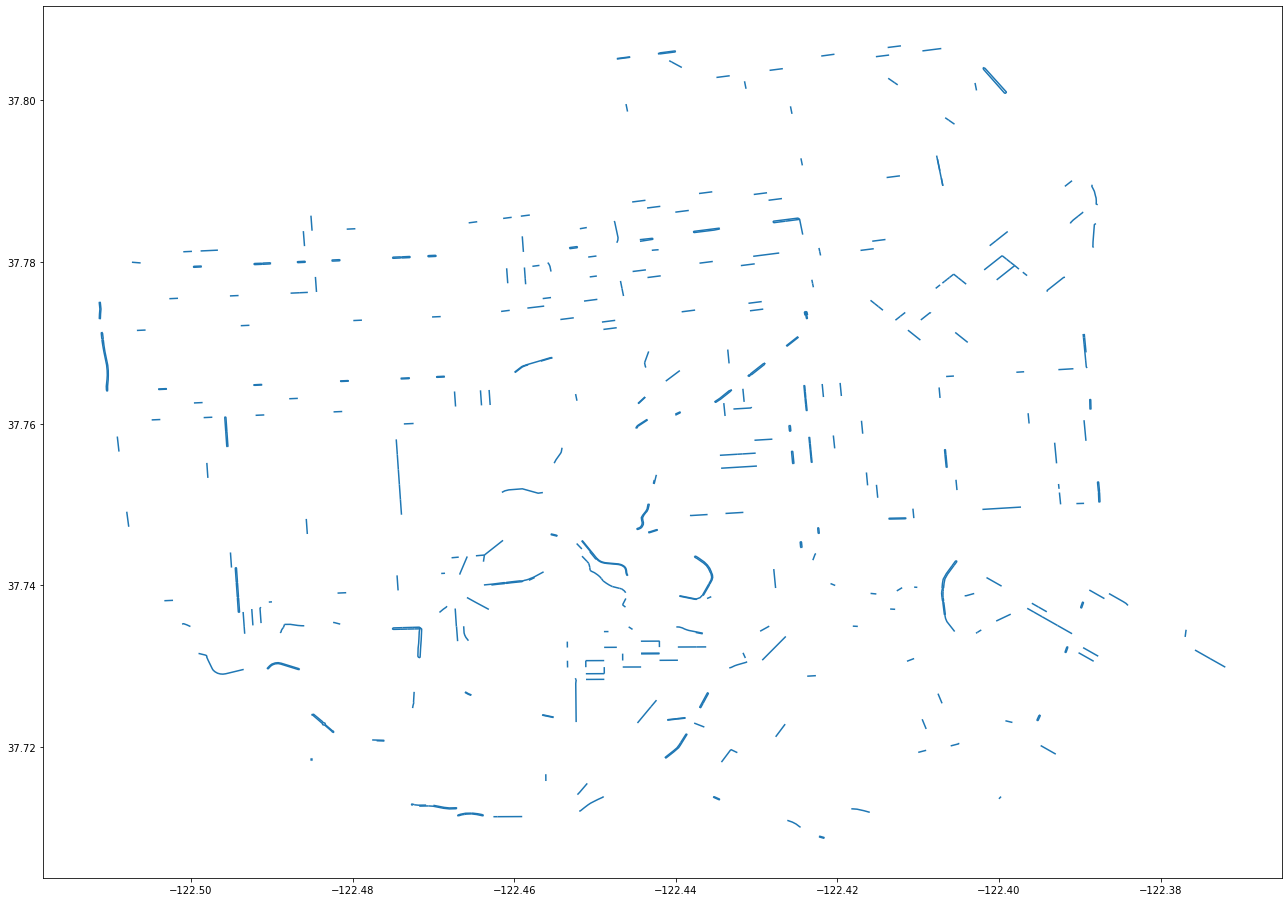

In [4]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
unique_result.geometry.plot(ax=ax)
plt.tight_layout()

C:\Users\Daniel\.conda\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


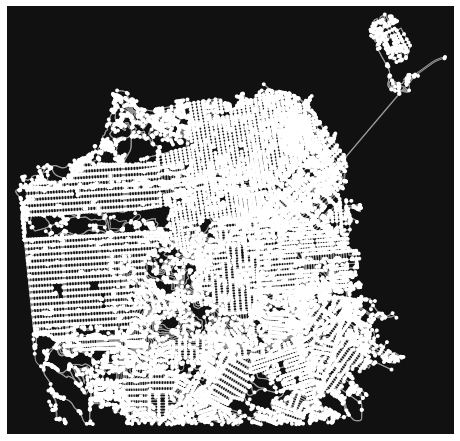

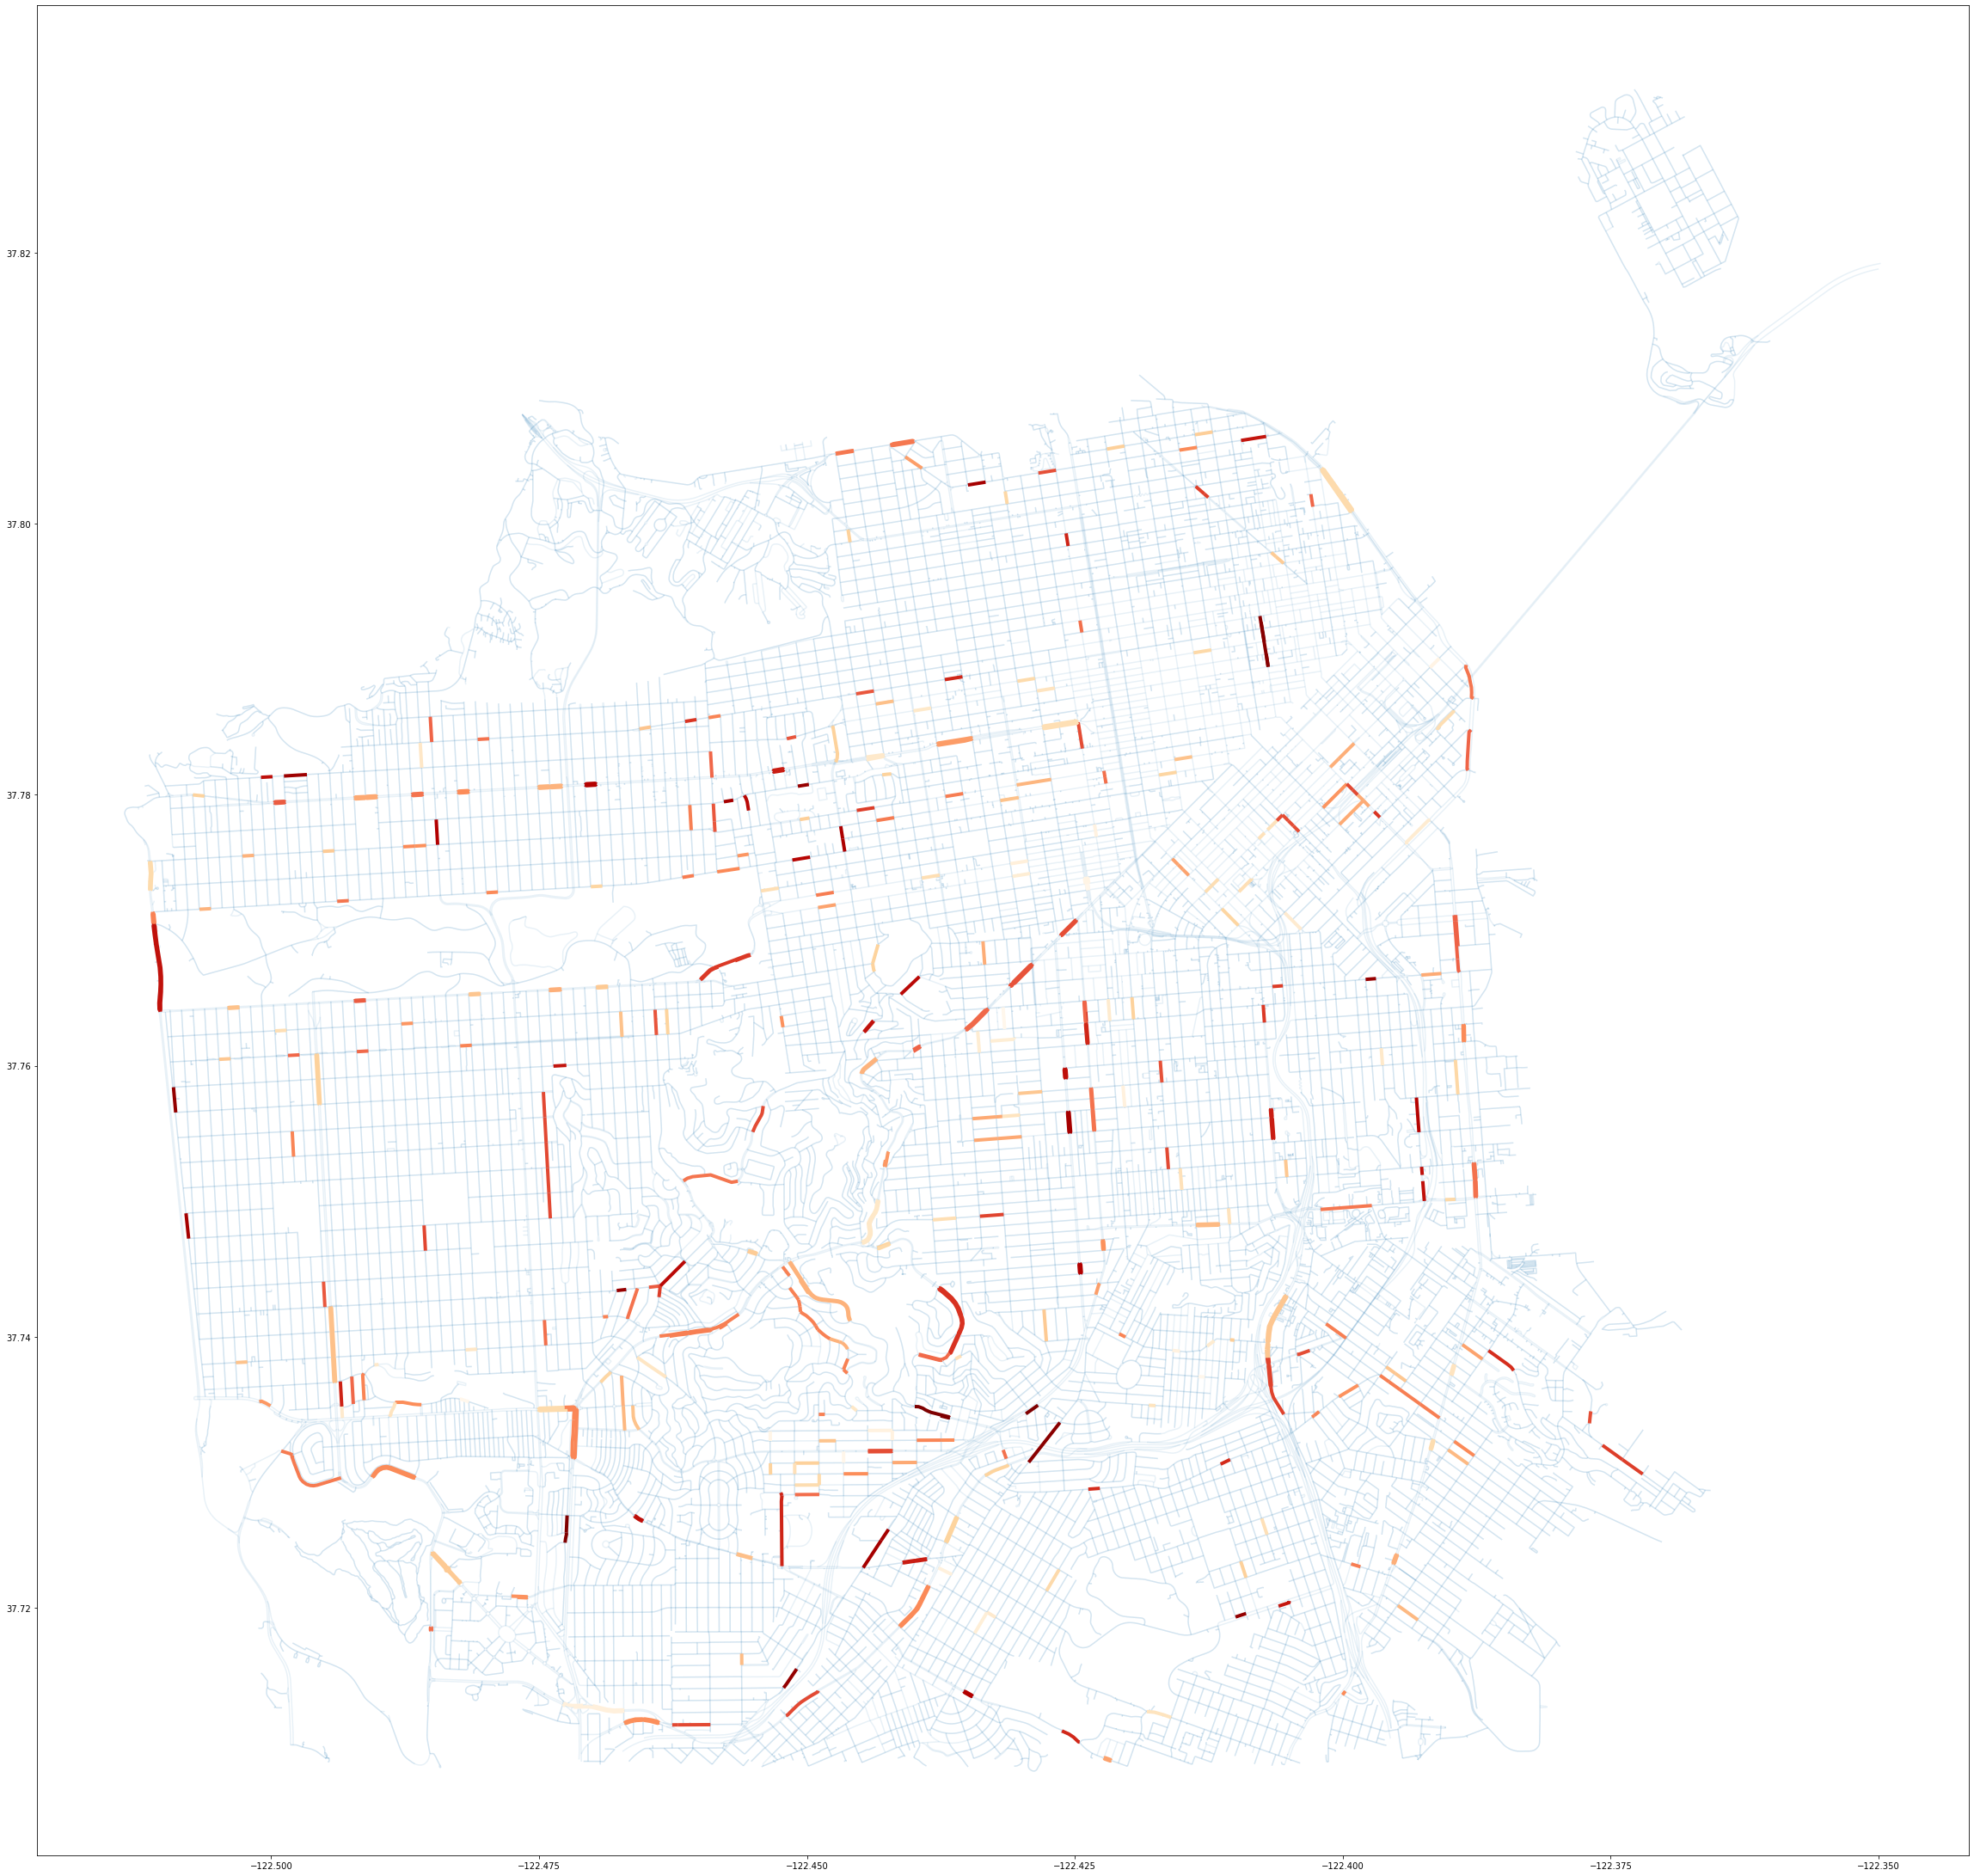

In [5]:
G = ox.graph_from_place('San Francisco, California', network_type='drive_service')
ox.plot_graph(G)

# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

fig, ax = plt.subplots(figsize=(32,40))

edges.plot(ax=ax, markersize=0.3, alpha=0.1) 
unique_result.plot(ax=ax, linewidth=4, column='Over_pct', cmap='OrRd')
plt.tight_layout()

In [6]:
edges

osmid  \
u          v          key                                                      
32927563   645559609  0                     [50690291, 179235221, 661905446]   
32927591   315706881  0                                             28715659   
           6469349533 0                                            689603997   
32927645   65331336   0                        [28846637, 8918870, 61424023]   
           766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   
...                                                                      ...   
9728390500 9728390499 0                                           1058733099   
9765282208 259141386  0                                             23908176   
           65323085   0                                             32928788   
           65296736   0                                             32928788   
9781183485 3458064558 0                  [1065081988, 1065081989, 104110094]   

                           oneway lanes    ref  \
u          v          key                        
32927563   645559609  0      True     5   I 80   
32927591   315706881  0      True     1    NaN   
           6469349533 0      True     4  I 280   
32927645   65331336   0      True     2  I 280   
           766946830  0      True     2    NaN   
...                           ...   ...    ...   
9728390500 9728390499 0     False   NaN    NaN   
9765282208 259141386  0     False   NaN    NaN   
           65323085   0     False     2    NaN   
           65296736   0     False     2    NaN   
9781183485 3458064558 0     False   NaN    NaN   

                                                         name        highway  \
u          v          key                                                      
32927563   645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591   315706881  0                                   NaN  motorway_link   
           6469349533 0                  John F Foran Freeway       motorway   
32927645   65331336   0          Southern Embarcadero Freeway       motorway   
           766946830  0                                   NaN  motorway_link   
...                                                       ...            ...   
9728390500 9728390499 0                                   NaN        service   
9765282208 259141386  0                                   NaN        service   
           65323085   0       Martin Luther King Junior Drive       tertiary   
           65296736   0       Martin Luther King Junior Drive       tertiary   
9781183485 3458064558 0                       Arellano Avenue        service   

                          maxspeed    length bridge  \
u          v          key                             
32927563   645559609  0     50 mph  3232.712    yes   
32927591   315706881  0        NaN   333.165    NaN   
           6469349533 0     65 mph   794.493    NaN   
32927645   65331336   0     65 mph  1196.665    yes   
           766946830  0     50 mph  1174.585    yes   
...                            ...       ...    ...   
9728390500 9728390499 0        NaN    14.643    NaN   
9765282208 259141386  0        NaN    33.416    NaN   
           65323085   0        NaN    41.427    NaN   
           65296736   0        NaN    38.591    NaN   
9781183485 3458064558 0        NaN    97.966    NaN   

                                                                    geometry  \
u          v          key                                                      
32927563   645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591   315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
           6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645   65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
           766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   
...                                                           

In [7]:
edges

osmid  \
u          v          key                                                      
32927563   645559609  0                     [50690291, 179235221, 661905446]   
32927591   315706881  0                                             28715659   
           6469349533 0                                            689603997   
32927645   65331336   0                        [28846637, 8918870, 61424023]   
           766946830  0    [8915137, 33645923, 33645968, 28656664, 61424026]   
...                                                                      ...   
9728390500 9728390499 0                                           1058733099   
9765282208 259141386  0                                             23908176   
           65323085   0                                             32928788   
           65296736   0                                             32928788   
9781183485 3458064558 0                  [1065081988, 1065081989, 104110094]   

                           oneway lanes    ref  \
u          v          key                        
32927563   645559609  0      True     5   I 80   
32927591   315706881  0      True     1    NaN   
           6469349533 0      True     4  I 280   
32927645   65331336   0      True     2  I 280   
           766946830  0      True     2    NaN   
...                           ...   ...    ...   
9728390500 9728390499 0     False   NaN    NaN   
9765282208 259141386  0     False   NaN    NaN   
           65323085   0     False     2    NaN   
           65296736   0     False     2    NaN   
9781183485 3458064558 0     False   NaN    NaN   

                                                         name        highway  \
u          v          key                                                      
32927563   645559609  0    San Francisco – Oakland Bay Bridge       motorway   
32927591   315706881  0                                   NaN  motorway_link   
           6469349533 0                  John F Foran Freeway       motorway   
32927645   65331336   0          Southern Embarcadero Freeway       motorway   
           766946830  0                                   NaN  motorway_link   
...                                                       ...            ...   
9728390500 9728390499 0                                   NaN        service   
9765282208 259141386  0                                   NaN        service   
           65323085   0       Martin Luther King Junior Drive       tertiary   
           65296736   0       Martin Luther King Junior Drive       tertiary   
9781183485 3458064558 0                       Arellano Avenue        service   

                          maxspeed    length bridge  \
u          v          key                             
32927563   645559609  0     50 mph  3232.712    yes   
32927591   315706881  0        NaN   333.165    NaN   
           6469349533 0     65 mph   794.493    NaN   
32927645   65331336   0     65 mph  1196.665    yes   
           766946830  0     50 mph  1174.585    yes   
...                            ...       ...    ...   
9728390500 9728390499 0        NaN    14.643    NaN   
9765282208 259141386  0        NaN    33.416    NaN   
           65323085   0        NaN    41.427    NaN   
           65296736   0        NaN    38.591    NaN   
9781183485 3458064558 0        NaN    97.966    NaN   

                                                                    geometry  \
u          v          key                                                      
32927563   645559609  0    LINESTRING (-122.39094 37.78592, -122.39068 37...   
32927591   315706881  0    LINESTRING (-122.42412 37.73135, -122.42362 37...   
           6469349533 0    LINESTRING (-122.42412 37.73135, -122.42396 37...   
32927645   65331336   0    LINESTRING (-122.41326 37.73271, -122.41224 37...   
           766946830  0    LINESTRING (-122.41326 37.73271, -122.41217 37...   
...                                                           

# Cleaning data

In [8]:
edges = edges.reset_index()
edges

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,length,bridge,geometry,access,service,junction,tunnel,width
0,32927563,645559609,0,"[50690291, 179235221, 661905446]",True,5,I 80,San Francisco – Oakland Bay Bridge,motorway,50 mph,3232.712,yes,"LINESTRING (-122.39094 37.78592, -122.39068 37...",NaN,NaN,NaN,NaN,NaN
1,32927591,315706881,0,28715659,True,1,NaN,NaN,motorway_link,NaN,333.165,NaN,"LINESTRING (-122.42412 37.73135, -122.42362 37...",NaN,NaN,NaN,NaN,NaN
2,32927591,6469349533,0,689603997,True,4,I 280,John F Foran Freeway,motorway,65 mph,794.493,NaN,"LINESTRING (-122.42412 37.73135, -122.42396 37...",NaN,NaN,NaN,NaN,NaN
3,32927645,65331336,0,"[28846637, 8918870, 61424023]",True,2,I 280,Southern Embarcadero Freeway,motorway,65 mph,1196.665,yes,"LINESTRING (-122.41326 37.73271, -122.41224 37...",NaN,NaN,NaN,NaN,NaN
4,32927645,766946830,0,"[8915137, 33645923, 33645968, 28656664, 61424026]",True,2,NaN,NaN,motorway_link,50 mph,1174.585,yes,"LINESTRING (-122.41326 37.73271, -122.41217 37...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,9728390500,9728390499,0,1058733099,False,NaN,NaN,NaN,service,NaN,14.643,NaN,"LINESTRING (-122.42627 37.78316, -122.42628 37...",NaN,driveway,NaN,NaN,NaN
40563,9765282208,259141386,0,23908176,False,NaN,NaN,NaN,service,NaN,33.416,NaN,"LINESTRING (-122.47293 37.76724, -122.47286 37...",NaN,NaN,NaN,NaN,NaN
40564,9765282208,65323085,0,32928788,False,2,NaN,Martin Luther King Junior Drive,tertiary,NaN,41.427,NaN,"LINESTRING (-122.47293 37.76724, -122.47295 37...",NaN,NaN,NaN,NaN,NaN
40565,9765282208,65296736,0,32928788,False,2,NaN,Martin Luther King Junior Drive,tertiary,NaN,38.591,NaN,"LINESTRING (-122.47293 37.76724, -122.47289 37...",NaN,NaN,NaN,NaN,NaN


In [9]:
edges['bridge'].value_counts()

yes               248
movable            10
[movable, yes]      2
[no, yes]           2
Name: bridge, dtype: int64

In [10]:
edges.drop(columns=['u','v','osmid','name'], inplace = True)

In [11]:
edges

,key,oneway,lanes,ref,highway,maxspeed,length,bridge,geometry,access,service,junction,tunnel,width
0,0,True,5,I 80,motorway,50 mph,3232.712,yes,"LINESTRING (-122.39094 37.78592, -122.39068 37...",NaN,NaN,NaN,NaN,NaN
1,0,True,1,NaN,motorway_link,NaN,333.165,NaN,"LINESTRING (-122.42412 37.73135, -122.42362 37...",NaN,NaN,NaN,NaN,NaN
2,0,True,4,I 280,motorway,65 mph,794.493,NaN,"LINESTRING (-122.42412 37.73135, -122.42396 37...",NaN,NaN,NaN,NaN,NaN
3,0,True,2,I 280,motorway,65 mph,1196.665,yes,"LINESTRING (-122.41326 37.73271, -122.41224 37...",NaN,NaN,NaN,NaN,NaN
4,0,True,2,NaN,motorway_link,50 mph,1174.585,yes,"LINESTRING (-122.41326 37.73271, -122.41217 37...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,False,NaN,NaN,service,NaN,14.643,NaN,"LINESTRING (-122.42627 37.78316, -122.42628 37...",NaN,driveway,NaN,NaN,NaN
40563,0,False,NaN,NaN,service,NaN,33.416,NaN,"LINESTRING (-122.47293 37.76724, -122.47286 37...",NaN,NaN,NaN,NaN,NaN
40564,0,False,2,NaN,tertiary,NaN,41.427,NaN,"LINESTRING (-122.47293 37.76724, -122.47295 37...",NaN,NaN,NaN,NaN,NaN
40565,0,False,2,NaN,tertiary,NaN,38.591,NaN,"LINESTRING (-122.47293 37.76724, -122.47289 37...",NaN,NaN,NaN,NaN,NaN


In [12]:
edges['tunnel'].unique()

array([nan, 'yes', 'building_passage'], dtype=object)

In [13]:
edges[edges['ref']=='US 101']

,key,oneway,lanes,ref,highway,maxspeed,length,bridge,geometry,access,service,junction,tunnel,width
313,0,True,3,US 101,motorway,50 mph,245.252,yes,"LINESTRING (-122.40800 37.73872, -122.40800 37...",NaN,NaN,NaN,NaN,NaN
489,0,True,2,US 101,motorway,50 mph,435.627,yes,"LINESTRING (-122.40689 37.76902, -122.40702 37...",NaN,NaN,NaN,NaN,NaN
504,0,True,4,US 101,motorway,50 mph,967.865,yes,"LINESTRING (-122.40509 37.74486, -122.40504 37...",NaN,NaN,NaN,NaN,NaN
513,0,True,2,US 101,motorway_link,50 mph,333.584,yes,"LINESTRING (-122.41573 37.76964, -122.41617 37...",NaN,NaN,NaN,NaN,NaN
514,0,True,"[3, 2]",US 101,motorway,50 mph,757.753,yes,"LINESTRING (-122.41573 37.76964, -122.41596 37...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39184,0,True,3,US 101,trunk,25 mph,40.325,NaN,"LINESTRING (-122.42234 37.78976, -122.42229 37...",NaN,NaN,NaN,NaN,NaN
39240,0,True,3,US 101,trunk,25 mph,27.724,NaN,"LINESTRING (-122.42239 37.79001, -122.42234 37...",NaN,NaN,NaN,NaN,NaN
39359,0,True,4,US 101,motorway,"[45 mph, 35 mph]",887.393,NaN,"LINESTRING (-122.46503 37.80201, -122.46488 37...",NaN,NaN,NaN,yes,NaN
40379,0,True,3,US 101,trunk,NaN,32.849,NaN,"LINESTRING (-122.44634 37.79977, -122.44617 37...",NaN,NaN,NaN,NaN,NaN


In [14]:
edges['maxspeed'] = edges.maxspeed.str.extract('(\d+)')
edges['maxspeed'] = edges['maxspeed'].astype(float)

### Change data type of speedlimit to float

In [15]:
edges

,key,oneway,lanes,ref,highway,maxspeed,length,bridge,geometry,access,service,junction,tunnel,width
0,0,True,5,I 80,motorway,50.0,3232.712,yes,"LINESTRING (-122.39094 37.78592, -122.39068 37...",NaN,NaN,NaN,NaN,NaN
1,0,True,1,NaN,motorway_link,NaN,333.165,NaN,"LINESTRING (-122.42412 37.73135, -122.42362 37...",NaN,NaN,NaN,NaN,NaN
2,0,True,4,I 280,motorway,65.0,794.493,NaN,"LINESTRING (-122.42412 37.73135, -122.42396 37...",NaN,NaN,NaN,NaN,NaN
3,0,True,2,I 280,motorway,65.0,1196.665,yes,"LINESTRING (-122.41326 37.73271, -122.41224 37...",NaN,NaN,NaN,NaN,NaN
4,0,True,2,NaN,motorway_link,50.0,1174.585,yes,"LINESTRING (-122.41326 37.73271, -122.41217 37...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,False,NaN,NaN,service,NaN,14.643,NaN,"LINESTRING (-122.42627 37.78316, -122.42628 37...",NaN,driveway,NaN,NaN,NaN
40563,0,False,NaN,NaN,service,NaN,33.416,NaN,"LINESTRING (-122.47293 37.76724, -122.47286 37...",NaN,NaN,NaN,NaN,NaN
40564,0,False,2,NaN,tertiary,NaN,41.427,NaN,"LINESTRING (-122.47293 37.76724, -122.47295 37...",NaN,NaN,NaN,NaN,NaN
40565,0,False,2,NaN,tertiary,NaN,38.591,NaN,"LINESTRING (-122.47293 37.76724, -122.47289 37...",NaN,NaN,NaN,NaN,NaN


In [16]:
dummies = pd.get_dummies(edges['oneway'],prefix="oneway")
edges.drop(columns=['oneway'], inplace = True)
edges = edges.join(dummies)
edges

,key,lanes,ref,highway,maxspeed,length,bridge,geometry,access,service,junction,tunnel,width,oneway_False,oneway_True
0,0,5,I 80,motorway,50.0,3232.712,yes,"LINESTRING (-122.39094 37.78592, -122.39068 37...",NaN,NaN,NaN,NaN,NaN,0,1
1,0,1,NaN,motorway_link,NaN,333.165,NaN,"LINESTRING (-122.42412 37.73135, -122.42362 37...",NaN,NaN,NaN,NaN,NaN,0,1
2,0,4,I 280,motorway,65.0,794.493,NaN,"LINESTRING (-122.42412 37.73135, -122.42396 37...",NaN,NaN,NaN,NaN,NaN,0,1
3,0,2,I 280,motorway,65.0,1196.665,yes,"LINESTRING (-122.41326 37.73271, -122.41224 37...",NaN,NaN,NaN,NaN,NaN,0,1
4,0,2,NaN,motorway_link,50.0,1174.585,yes,"LINESTRING (-122.41326 37.73271, -122.41217 37...",NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,NaN,NaN,service,NaN,14.643,NaN,"LINESTRING (-122.42627 37.78316, -122.42628 37...",NaN,driveway,NaN,NaN,NaN,1,0
40563,0,NaN,NaN,service,NaN,33.416,NaN,"LINESTRING (-122.47293 37.76724, -122.47286 37...",NaN,NaN,NaN,NaN,NaN,1,0
40564,0,2,NaN,tertiary,NaN,41.427,NaN,"LINESTRING (-122.47293 37.76724, -122.47295 37...",NaN,NaN,NaN,NaN,NaN,1,0
40565,0,2,NaN,tertiary,NaN,38.591,NaN,"LINESTRING (-122.47293 37.76724, -122.47289 37...",NaN,NaN,NaN,NaN,NaN,1,0


### Fetching SanFranciscoSpeedLimitCompliance data

In [17]:
df = pd.read_csv('./data/SanFranciscoSpeedLimitCompliance.csv')
from shapely import wkt
df['the_geom'] = df['the_geom'].apply(wkt.loads)
gdfSpeed = gpd.GeoDataFrame(df, crs='epsg:4326')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\2503447945.py:4: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdfSpeed = gpd.GeoDataFrame(df, crs='epsg:4326')


In [18]:
gdfSpeed

,CNN,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,6709000,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,6710000,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,6719000,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,194101,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,194201,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
...,...,...,...,...,...,...,...,...,...
608,409000,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
609,410000,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
610,411000,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
611,415000,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18.00,0.00,25.10,32.00,0.00


### Dropping unnecessary column

In [19]:
gdfSpeed.drop(columns=['CNN'], inplace = True)
gdfSpeed

,the_geom,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,LINESTRING (-122.39031948388298 37.78813450234...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,LINESTRING (-122.39117965804613 37.78745518697...,30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,LINESTRING (-122.39961623244395 37.78079148306...,30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,LINESTRING (-122.38775628064698 37.75283561191...,30,3RD ST,58.50,25.50,31.26,34.89,38.63
...,...,...,...,...,...,...,...,...
608,LINESTRING (-122.41160611273487 37.77622135626...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
609,LINESTRING (-122.41106944267237 37.77579380416...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
610,LINESTRING (-122.41061072931767 37.77542835163...,30,8TH ST,16.00,1.00,26.20,32.31,37.00
611,LINESTRING (-122.40851633075071 37.77375969975...,30,8TH ST,18.00,0.00,25.10,32.00,0.00


In [20]:
gdfSpeed['SpeedLimit'].replace({0:25}, inplace=True)

In [21]:
gdfSpeed = gdfSpeed.rename(columns ={'the_geom':'geometry'})

In [22]:
gdfSpeed.head()

,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg
0,"LINESTRING (-122.39032 37.78813, -122.39118 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00
3,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63
4,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63


### second attempt using geopandas.buffer

In [23]:
gdfSpeed["buffered_geometry"] = gdfSpeed.buffer(0.0001)

In [24]:
gdfSpeed.head()

,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,buffered_geometry
0,"LINESTRING (-122.39032 37.78813, -122.39118 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,"POLYGON ((-122.39112 37.78738, -122.39113 37.7..."
1,"LINESTRING (-122.39118 37.78746, -122.39205 37...",30,HARRISON ST,39.77,11.11,28.40,33.76,38.32,"POLYGON ((-122.39199 37.78669, -122.39200 37.7..."
2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.00,29.55,33.88,38.00,"POLYGON ((-122.40178 37.77895, -122.40179 37.7..."
3,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63,"POLYGON ((-122.38761 37.75282, -122.38760 37.7..."
4,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,3RD ST,58.50,25.50,31.26,34.89,38.63,"POLYGON ((-122.38771 37.75272, -122.38761 37.7..."


In [25]:
buffered_result = gpd.sjoin(gdfSpeed.set_geometry("buffered_geometry"), edges[edges.columns], how='inner', predicate='contains')

In [26]:
len(buffered_result)

1942

In [27]:
unique_result = buffered_result.reset_index()
unique_result.drop_duplicates(subset=["geometry", "buffered_geometry"], inplace=True)
unique_result

,index,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,buffered_geometry,...,maxspeed,length,bridge,access,service,junction,tunnel,width,oneway_False,oneway_True
0,2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.0,29.55,33.88,38.00,"POLYGON ((-122.40178 37.77895, -122.40179 37.7...",...,25.0,23.372,NaN,NaN,NaN,NaN,NaN,NaN,0,1
5,3,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,"POLYGON ((-122.38761 37.75282, -122.38760 37.7...",...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
6,4,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,"POLYGON ((-122.38771 37.75272, -122.38761 37.7...",...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
7,5,"LINESTRING (-122.38763 37.75156, -122.38756 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,"POLYGON ((-122.38748 37.75153, -122.38748 37.7...",...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
8,6,"LINESTRING (-122.38763 37.75156, -122.38770 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,"POLYGON ((-122.38760 37.75143, -122.38755 37.7...",...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,607,"LINESTRING (-122.41128 37.77158, -122.40974 37...",30,10TH ST,24.00,4.0,26.35,32.83,37.00,"POLYGON ((-122.40967 37.77043, -122.40967 37.7...",...,25.0,45.749,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1928,608,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,8TH ST,16.00,1.0,26.20,32.31,37.00,"POLYGON ((-122.41101 37.77587, -122.41100 37.7...",...,30.0,23.235,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1930,609,"LINESTRING (-122.41107 37.77579, -122.41061 37...",30,8TH ST,16.00,1.0,26.20,32.31,37.00,"POLYGON ((-122.41055 37.77551, -122.41054 37.7...",...,30.0,60.000,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1931,610,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,8TH ST,16.00,1.0,26.20,32.31,37.00,"POLYGON ((-122.41000 37.77507, -122.40999 37.7...",...,30.0,67.051,NaN,NaN,NaN,NaN,NaN,NaN,0,1


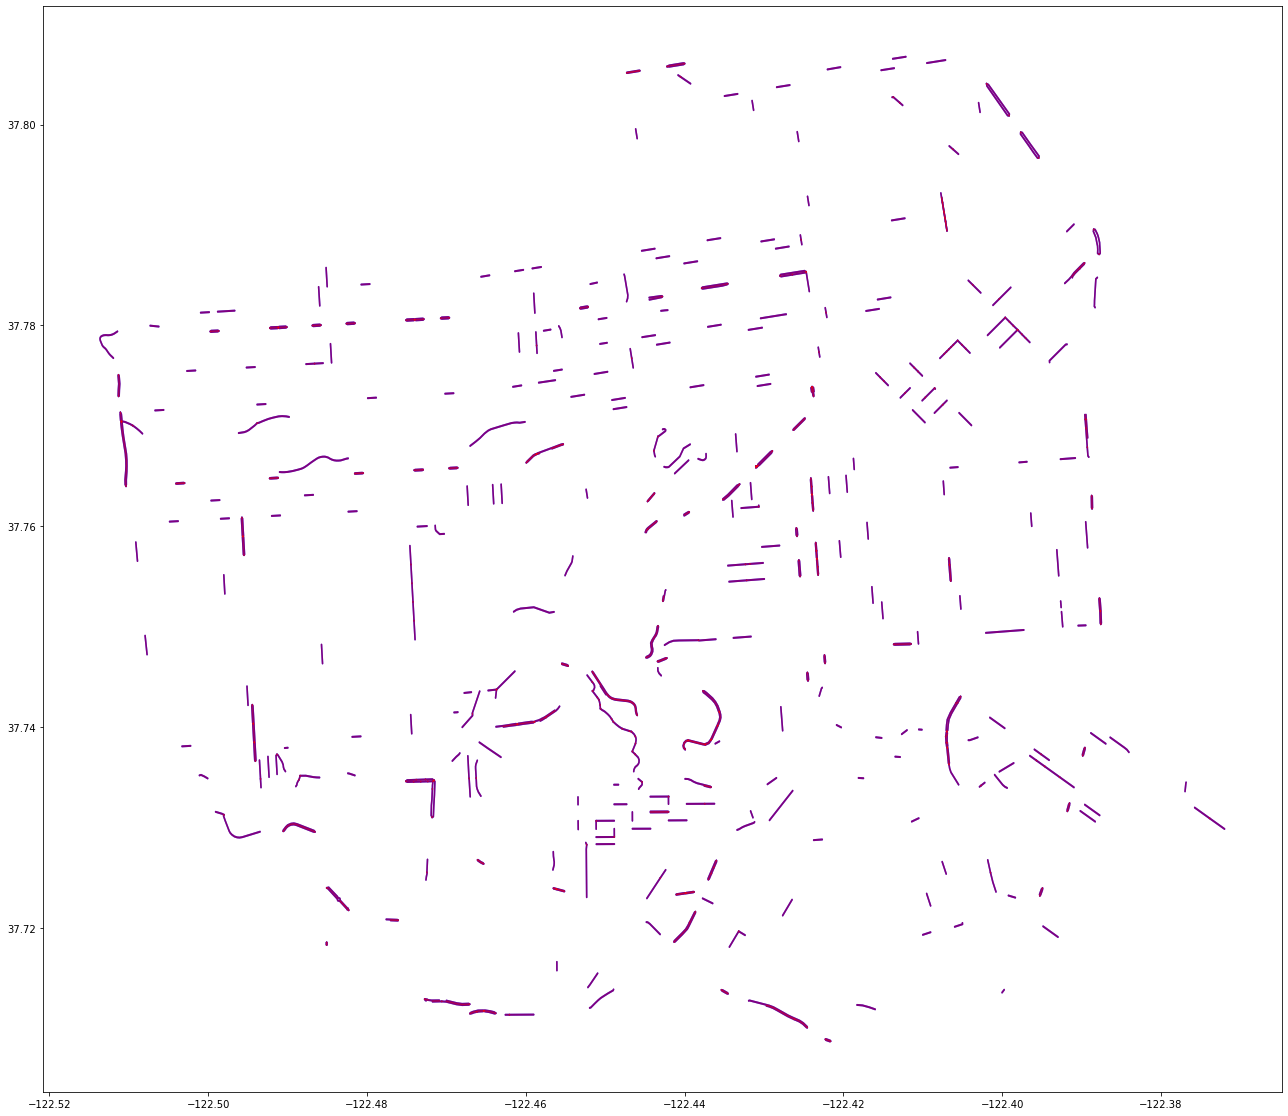

In [28]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
unique_result.geometry.plot(ax=ax, facecolor='blue')
unique_result.buffered_geometry.plot(ax=ax, color='red', alpha=0.5)
plt.tight_layout()

In [29]:
unique_result.reset_index(inplace=True)

In [30]:
unique_result

,level_0,index,geometry,SpeedLimit,STREETNAME,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,...,maxspeed,length,bridge,access,service,junction,tunnel,width,oneway_False,oneway_True
0,0,2,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,HARRISON ST,48.00,15.0,29.55,33.88,38.00,...,25.0,23.372,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,5,3,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,6,4,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,7,5,"LINESTRING (-122.38763 37.75156, -122.38756 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,8,6,"LINESTRING (-122.38763 37.75156, -122.38770 37...",30,3RD ST,58.50,25.5,31.26,34.89,38.63,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,1924,607,"LINESTRING (-122.41128 37.77158, -122.40974 37...",30,10TH ST,24.00,4.0,26.35,32.83,37.00,...,25.0,45.749,NaN,NaN,NaN,NaN,NaN,NaN,0,1
551,1928,608,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,8TH ST,16.00,1.0,26.20,32.31,37.00,...,30.0,23.235,NaN,NaN,NaN,NaN,NaN,NaN,0,1
552,1930,609,"LINESTRING (-122.41107 37.77579, -122.41061 37...",30,8TH ST,16.00,1.0,26.20,32.31,37.00,...,30.0,60.000,NaN,NaN,NaN,NaN,NaN,NaN,0,1
553,1931,610,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,8TH ST,16.00,1.0,26.20,32.31,37.00,...,30.0,67.051,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [31]:
unique_result.columns

Index(['level_0', 'index', 'geometry', 'SpeedLimit', 'STREETNAME', 'Over_pct',
       'O5mph_pct', 'Speed_avg', 'SpeedO_avg', 'Spd5O_avg',
       'buffered_geometry', 'index_right', 'key', 'lanes', 'ref', 'highway',
       'maxspeed', 'length', 'bridge', 'access', 'service', 'junction',
       'tunnel', 'width', 'oneway_False', 'oneway_True'],
      dtype='object')

In [32]:
unique_result.drop(columns=["level_0", "index", "STREETNAME", "index_right", "buffered_geometry"], inplace=True)

In [33]:
unique_result

,geometry,SpeedLimit,Over_pct,O5mph_pct,Speed_avg,SpeedO_avg,Spd5O_avg,key,lanes,ref,...,maxspeed,length,bridge,access,service,junction,tunnel,width,oneway_False,oneway_True
0,"LINESTRING (-122.39962 37.78079, -122.40184 37...",30,48.00,15.0,29.55,33.88,38.00,0,5,NaN,...,25.0,23.372,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,"LINESTRING (-122.38776 37.75284, -122.38768 37...",30,58.50,25.5,31.26,34.89,38.63,0,NaN,NaN,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,"LINESTRING (-122.38776 37.75284, -122.38782 37...",30,58.50,25.5,31.26,34.89,38.63,0,NaN,NaN,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,"LINESTRING (-122.38763 37.75156, -122.38756 37...",30,58.50,25.5,31.26,34.89,38.63,0,NaN,NaN,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,"LINESTRING (-122.38763 37.75156, -122.38770 37...",30,58.50,25.5,31.26,34.89,38.63,0,NaN,NaN,...,NaN,13.634,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,"LINESTRING (-122.41128 37.77158, -122.40974 37...",30,24.00,4.0,26.35,32.83,37.00,0,4,NaN,...,25.0,45.749,NaN,NaN,NaN,NaN,NaN,NaN,0,1
551,"LINESTRING (-122.41161 37.77622, -122.41107 37...",30,16.00,1.0,26.20,32.31,37.00,0,3,NaN,...,30.0,23.235,NaN,NaN,NaN,NaN,NaN,NaN,0,1
552,"LINESTRING (-122.41107 37.77579, -122.41061 37...",30,16.00,1.0,26.20,32.31,37.00,0,3,NaN,...,30.0,60.000,NaN,NaN,NaN,NaN,NaN,NaN,0,1
553,"LINESTRING (-122.41061 37.77543, -122.41006 37...",30,16.00,1.0,26.20,32.31,37.00,0,"[3, 4]",NaN,...,30.0,67.051,NaN,NaN,NaN,NaN,NaN,NaN,0,1


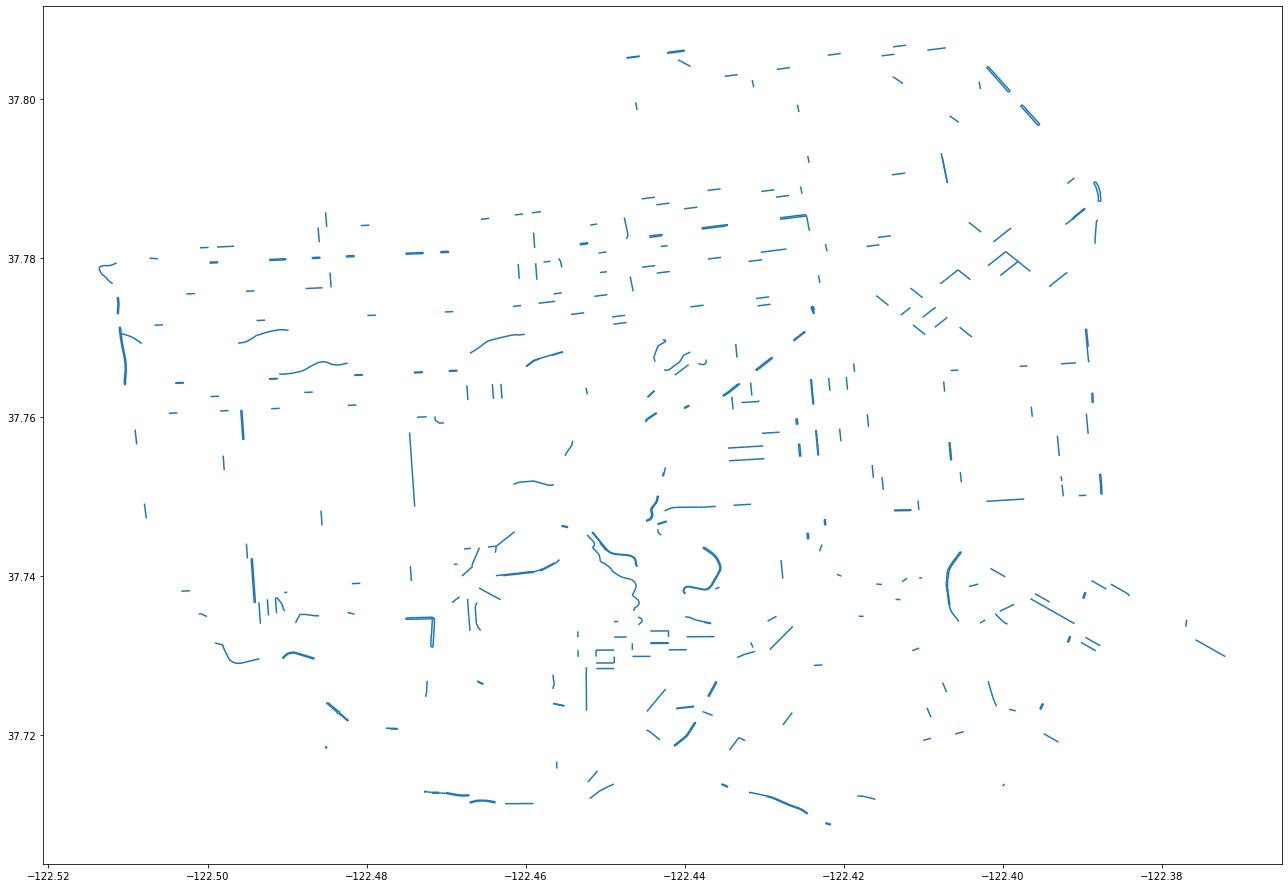

In [34]:
fig, ax = plt.subplots(figsize=(18,20))

# Plot the footprint
unique_result.geometry.plot(ax=ax)
plt.tight_layout()

In [35]:
fileObject = open("unique_result_with_details.pkl", 'wb')
pkl.dump(unique_result, fileObject)
fileObject.close()

# Preparing data set to machine learning

# Speed limit data set

### centroid of the linestring

In [36]:
unique_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      555 non-null    geometry
 1   SpeedLimit    555 non-null    int64   
 2   Over_pct      555 non-null    float64 
 3   O5mph_pct     555 non-null    float64 
 4   Speed_avg     555 non-null    float64 
 5   SpeedO_avg    555 non-null    float64 
 6   Spd5O_avg     555 non-null    float64 
 7   key           555 non-null    int64   
 8   lanes         314 non-null    object  
 9   ref           1 non-null      object  
 10  highway       555 non-null    object  
 11  maxspeed      279 non-null    float64 
 12  length        555 non-null    float64 
 13  bridge        3 non-null      object  
 14  access        3 non-null      object  
 15  service       1 non-null      object  
 16  junction      4 non-null      object  
 17  tunnel        0 non-null      object  
 18  wi

In [55]:
ml_X = unique_result[['key','lanes','highway','maxspeed','length','oneway_False','oneway_True']]
ml_X['centroid_X'] = unique_result['geometry'].centroid.x
ml_X['centroid_Y'] = unique_result['geometry'].centroid.y

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\2411564914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_X['centroid_X'] = unique_result['geometry'].centroid.x
C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\2411564914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_X['centroid_Y'] = unique_result['geometry'].centroid.y


In [56]:
ml_X

,key,lanes,highway,maxspeed,length,oneway_False,oneway_True,centroid_X,centroid_Y
0,0,5,secondary,25.0,23.372,0,1,-122.400730,37.779912
1,0,NaN,unclassified,NaN,13.634,1,0,-122.387632,37.752202
2,0,NaN,unclassified,NaN,13.634,1,0,-122.387758,37.752192
3,0,NaN,unclassified,NaN,13.634,1,0,-122.387545,37.750914
4,0,NaN,unclassified,NaN,13.634,1,0,-122.387668,37.750911
...,...,...,...,...,...,...,...,...,...
550,0,4,secondary,25.0,45.749,0,1,-122.410507,37.770964
551,0,3,secondary,30.0,23.235,0,1,-122.411338,37.776008
552,0,3,secondary,30.0,60.000,0,1,-122.410840,37.775611
553,0,"[3, 4]",secondary,30.0,67.051,0,1,-122.410337,37.775210


In [57]:
ml_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           555 non-null    int64  
 1   lanes         314 non-null    object 
 2   highway       555 non-null    object 
 3   maxspeed      279 non-null    float64
 4   length        555 non-null    float64
 5   oneway_False  555 non-null    uint8  
 6   oneway_True   555 non-null    uint8  
 7   centroid_X    555 non-null    float64
 8   centroid_Y    555 non-null    float64
dtypes: float64(4), int64(1), object(2), uint8(2)
memory usage: 31.6+ KB


### one hot encoding for lanes column

In [58]:
ml_X['lanes'].value_counts()

2            156
3             52
4             46
5             16
[3, 2]        14
1             10
[3, 4]         6
6              3
[3, 5]         3
[4, 5]         3
[4, 2]         2
[2, 1]         1
[3, 4, 2]      1
[3, 4, 5]      1
Name: lanes, dtype: int64

In [68]:
dummies = pd.get_dummies(ml_X['lanes'].apply(pd.Series).stack(),prefix="lanes").sum(level=0)
dummies

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\1685296288.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(ml_X['lanes'].apply(pd.Series).stack(),prefix="lanes").sum(level=0)


,lanes_1,lanes_2,lanes_3,lanes_4,lanes_5,lanes_6
0,0,0,0,0,1,0
6,0,0,1,0,0,0
7,0,1,1,0,0,0
8,0,0,1,0,0,0
9,0,1,0,0,0,0
...,...,...,...,...,...,...
549,0,0,0,1,0,0
550,0,0,0,1,0,0
551,0,0,1,0,0,0
552,0,0,1,0,0,0


In [69]:
dummies =  pd.get_dummies(ml_X['lanes'].apply(pd.Series).stack(),prefix="lanes").sum(level=0)
ml_X.drop(columns=['lanes'], inplace = True)
ml_X = ml_X.join(dummies)
ml_X

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\2730767598.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies =  pd.get_dummies(ml_X['lanes'].apply(pd.Series).stack(),prefix="lanes").sum(level=0)


,key,highway,length,oneway_False,oneway_True,centroid_X,centroid_Y,maxspeed_15.0,maxspeed_20.0,maxspeed_25.0,maxspeed_30.0,maxspeed_35.0,maxspeed_40.0,maxspeed_65.0,lanes_1,lanes_2,lanes_3,lanes_4,lanes_5,lanes_6
0,0,secondary,23.372,0,1,-122.400730,37.779912,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,unclassified,13.634,1,0,-122.387632,37.752202,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,unclassified,13.634,1,0,-122.387758,37.752192,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,unclassified,13.634,1,0,-122.387545,37.750914,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,unclassified,13.634,1,0,-122.387668,37.750911,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,secondary,45.749,0,1,-122.410507,37.770964,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
551,0,secondary,23.235,0,1,-122.411338,37.776008,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
552,0,secondary,60.000,0,1,-122.410840,37.775611,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
553,0,secondary,67.051,0,1,-122.410337,37.775210,0,0,0,1,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [72]:
ml_X[['lanes_1', 'lanes_2','lanes_3','lanes_4', 'lanes_5','lanes_6']] = ml_X[['lanes_1', 'lanes_2','lanes_3','lanes_4', 'lanes_5','lanes_6']].fillna(value=0)

In [73]:
ml_X

,key,highway,length,oneway_False,oneway_True,centroid_X,centroid_Y,maxspeed_15.0,maxspeed_20.0,maxspeed_25.0,maxspeed_30.0,maxspeed_35.0,maxspeed_40.0,maxspeed_65.0,lanes_1,lanes_2,lanes_3,lanes_4,lanes_5,lanes_6
0,0,secondary,23.372,0,1,-122.400730,37.779912,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,unclassified,13.634,1,0,-122.387632,37.752202,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,unclassified,13.634,1,0,-122.387758,37.752192,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,unclassified,13.634,1,0,-122.387545,37.750914,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,unclassified,13.634,1,0,-122.387668,37.750911,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,secondary,45.749,0,1,-122.410507,37.770964,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
551,0,secondary,23.235,0,1,-122.411338,37.776008,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
552,0,secondary,60.000,0,1,-122.410840,37.775611,0,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
553,0,secondary,67.051,0,1,-122.410337,37.775210,0,0,0,1,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0


### one hot encoding for maxspeed column

In [86]:
dummies = pd.get_dummies(ml_X['maxspeed'],prefix="maxspeed")
ml_X.drop(columns=['maxspeed'], inplace = True)
ml_X = ml_X.join(dummies)
ml_X

KeyError: 'maxspeed'

### one hot encoding for lanes highway

In [87]:
dummies = pd.get_dummies(ml_X['highway'],prefix="highway")
ml_X.drop(columns=['highway'], inplace = True)
ml_X = ml_X.join(dummies)
ml_X

,key,length,oneway_False,oneway_True,centroid_X,centroid_Y,maxspeed_15.0,maxspeed_20.0,maxspeed_25.0,maxspeed_30.0,...,lanes_5,lanes_6,highway_primary,highway_primary_link,highway_residential,highway_secondary,highway_service,highway_tertiary,highway_trunk,highway_unclassified
0,0,23.372,0,1,-122.400730,37.779912,0,0,1,0,...,1.0,0.0,0,0,0,1,0,0,0,0
1,0,13.634,1,0,-122.387632,37.752202,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,1
2,0,13.634,1,0,-122.387758,37.752192,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,1
3,0,13.634,1,0,-122.387545,37.750914,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,1
4,0,13.634,1,0,-122.387668,37.750911,0,0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0,45.749,0,1,-122.410507,37.770964,0,0,1,0,...,0.0,0.0,0,0,0,1,0,0,0,0
551,0,23.235,0,1,-122.411338,37.776008,0,0,0,1,...,0.0,0.0,0,0,0,1,0,0,0,0
552,0,60.000,0,1,-122.410840,37.775611,0,0,0,1,...,0.0,0.0,0,0,0,1,0,0,0,0
553,0,67.051,0,1,-122.410337,37.775210,0,0,0,1,...,0.0,0.0,0,0,0,1,0,0,0,0


In [88]:
pointsX = unique_result['geometry'].centroid.x

In [89]:
unique_result['geometry'].centroid.x

0     -122.400730
1     -122.387632
2     -122.387758
3     -122.387545
4     -122.387668
          ...    
550   -122.410507
551   -122.411338
552   -122.410840
553   -122.410337
554   -122.404651
Length: 555, dtype: float64

In [91]:
ml_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   555 non-null    int64  
 1   length                555 non-null    float64
 2   oneway_False          555 non-null    uint8  
 3   oneway_True           555 non-null    uint8  
 4   centroid_X            555 non-null    float64
 5   centroid_Y            555 non-null    float64
 6   maxspeed_15.0         555 non-null    uint8  
 7   maxspeed_20.0         555 non-null    uint8  
 8   maxspeed_25.0         555 non-null    uint8  
 9   maxspeed_30.0         555 non-null    uint8  
 10  maxspeed_35.0         555 non-null    uint8  
 11  maxspeed_40.0         555 non-null    uint8  
 12  maxspeed_65.0         555 non-null    uint8  
 13  lanes_1               555 non-null    float64
 14  lanes_2               555 non-null    float64
 15  lanes_3               5

In [92]:
ml_y = unique_result['Over_pct']

In [93]:
speed_limit = {'data':ml_X,'target':ml_y}
fileObject = open("speed_limit_ml_data_set.pkl", 'wb')
pkl.dump(speed_limit, fileObject)
fileObject.close()

# osmnx data set

In [123]:
edges_X = edges[['key','lanes','highway','maxspeed','length','oneway_False','oneway_True','geometry']]
edges_X['centroid_X'] = edges['geometry'].centroid.x
edges_X['centroid_Y'] = edges['geometry'].centroid.y

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\3230568684.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edges_X['centroid_X'] = edges['geometry'].centroid.x
C:\Users\Daniel\.conda\envs\ox\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\3230568684.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  edges_X['centroid_Y'] = edges['geo

In [124]:
edges_X

,key,lanes,highway,maxspeed,length,oneway_False,oneway_True,geometry,centroid_X,centroid_Y
0,0,5,motorway,50.0,3232.712,0,1,"LINESTRING (-122.39094 37.78592, -122.39068 37...",-122.379048,37.797001
1,0,1,motorway_link,NaN,333.165,0,1,"LINESTRING (-122.42412 37.73135, -122.42362 37...",-122.422241,37.731417
2,0,4,motorway,65.0,794.493,0,1,"LINESTRING (-122.42412 37.73135, -122.42396 37...",-122.419644,37.731732
3,0,2,motorway,65.0,1196.665,0,1,"LINESTRING (-122.41326 37.73271, -122.41224 37...",-122.407264,37.735112
4,0,2,motorway_link,50.0,1174.585,0,1,"LINESTRING (-122.41326 37.73271, -122.41217 37...",-122.409171,37.735984
...,...,...,...,...,...,...,...,...,...,...
40562,0,NaN,service,NaN,14.643,1,0,"LINESTRING (-122.42627 37.78316, -122.42628 37...",-122.426281,37.783226
40563,0,NaN,service,NaN,33.416,1,0,"LINESTRING (-122.47293 37.76724, -122.47286 37...",-122.472813,37.767126
40564,0,2,tertiary,NaN,41.427,1,0,"LINESTRING (-122.47293 37.76724, -122.47295 37...",-122.473124,37.767136
40565,0,2,tertiary,NaN,38.591,1,0,"LINESTRING (-122.47293 37.76724, -122.47289 37...",-122.472794,37.767376


### one hot encoding for lanes column

In [125]:
dummies =  pd.get_dummies(edges_X['lanes'].apply(pd.Series).stack(),prefix="lanes").sum(level=0)
edges_X.drop(columns=['lanes'], inplace = True)
edges_X = edges_X.join(dummies)
edges_X

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\4113097449.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies =  pd.get_dummies(edges_X['lanes'].apply(pd.Series).stack(),prefix="lanes").sum(level=0)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\4113097449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_X.drop(columns=['lanes'], inplace = True)


,key,highway,maxspeed,length,oneway_False,oneway_True,geometry,centroid_X,centroid_Y,lanes_1,lanes_2,lanes_3,lanes_4,lanes_5,lanes_6,lanes_7,lanes_8
0,0,motorway,50.0,3232.712,0,1,"LINESTRING (-122.39094 37.78592, -122.39068 37...",-122.379048,37.797001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,motorway_link,NaN,333.165,0,1,"LINESTRING (-122.42412 37.73135, -122.42362 37...",-122.422241,37.731417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,motorway,65.0,794.493,0,1,"LINESTRING (-122.42412 37.73135, -122.42396 37...",-122.419644,37.731732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,motorway,65.0,1196.665,0,1,"LINESTRING (-122.41326 37.73271, -122.41224 37...",-122.407264,37.735112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,motorway_link,50.0,1174.585,0,1,"LINESTRING (-122.41326 37.73271, -122.41217 37...",-122.409171,37.735984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,service,NaN,14.643,1,0,"LINESTRING (-122.42627 37.78316, -122.42628 37...",-122.426281,37.783226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40563,0,service,NaN,33.416,1,0,"LINESTRING (-122.47293 37.76724, -122.47286 37...",-122.472813,37.767126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40564,0,tertiary,NaN,41.427,1,0,"LINESTRING (-122.47293 37.76724, -122.47295 37...",-122.473124,37.767136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40565,0,tertiary,NaN,38.591,1,0,"LINESTRING (-122.47293 37.76724, -122.47289 37...",-122.472794,37.767376,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
edges_X[['lanes_1', 'lanes_2','lanes_3','lanes_4', 'lanes_5','lanes_6','lanes_7','lanes_8']] = edges_X[['lanes_1', 'lanes_2','lanes_3','lanes_4', 'lanes_5','lanes_6','lanes_7','lanes_8']].fillna(value=0)

In [127]:
edges_X

,key,highway,maxspeed,length,oneway_False,oneway_True,geometry,centroid_X,centroid_Y,lanes_1,lanes_2,lanes_3,lanes_4,lanes_5,lanes_6,lanes_7,lanes_8
0,0,motorway,50.0,3232.712,0,1,"LINESTRING (-122.39094 37.78592, -122.39068 37...",-122.379048,37.797001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,motorway_link,NaN,333.165,0,1,"LINESTRING (-122.42412 37.73135, -122.42362 37...",-122.422241,37.731417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,motorway,65.0,794.493,0,1,"LINESTRING (-122.42412 37.73135, -122.42396 37...",-122.419644,37.731732,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,motorway,65.0,1196.665,0,1,"LINESTRING (-122.41326 37.73271, -122.41224 37...",-122.407264,37.735112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,motorway_link,50.0,1174.585,0,1,"LINESTRING (-122.41326 37.73271, -122.41217 37...",-122.409171,37.735984,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,service,NaN,14.643,1,0,"LINESTRING (-122.42627 37.78316, -122.42628 37...",-122.426281,37.783226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40563,0,service,NaN,33.416,1,0,"LINESTRING (-122.47293 37.76724, -122.47286 37...",-122.472813,37.767126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40564,0,tertiary,NaN,41.427,1,0,"LINESTRING (-122.47293 37.76724, -122.47295 37...",-122.473124,37.767136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
40565,0,tertiary,NaN,38.591,1,0,"LINESTRING (-122.47293 37.76724, -122.47289 37...",-122.472794,37.767376,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### one hot encoding for maxspeed column

In [128]:
dummies = pd.get_dummies(edges_X['maxspeed'],prefix="maxspeed")
edges_X.drop(columns=['maxspeed'], inplace = True)
edges_X = edges_X.join(dummies)
edges_X

,key,highway,length,oneway_False,oneway_True,geometry,centroid_X,centroid_Y,lanes_1,lanes_2,...,maxspeed_15.0,maxspeed_20.0,maxspeed_25.0,maxspeed_30.0,maxspeed_35.0,maxspeed_40.0,maxspeed_45.0,maxspeed_50.0,maxspeed_55.0,maxspeed_65.0
0,0,motorway,3232.712,0,1,"LINESTRING (-122.39094 37.78592, -122.39068 37...",-122.379048,37.797001,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,motorway_link,333.165,0,1,"LINESTRING (-122.42412 37.73135, -122.42362 37...",-122.422241,37.731417,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,motorway,794.493,0,1,"LINESTRING (-122.42412 37.73135, -122.42396 37...",-122.419644,37.731732,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,motorway,1196.665,0,1,"LINESTRING (-122.41326 37.73271, -122.41224 37...",-122.407264,37.735112,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,0,motorway_link,1174.585,0,1,"LINESTRING (-122.41326 37.73271, -122.41217 37...",-122.409171,37.735984,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,service,14.643,1,0,"LINESTRING (-122.42627 37.78316, -122.42628 37...",-122.426281,37.783226,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
40563,0,service,33.416,1,0,"LINESTRING (-122.47293 37.76724, -122.47286 37...",-122.472813,37.767126,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
40564,0,tertiary,41.427,1,0,"LINESTRING (-122.47293 37.76724, -122.47295 37...",-122.473124,37.767136,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
40565,0,tertiary,38.591,1,0,"LINESTRING (-122.47293 37.76724, -122.47289 37...",-122.472794,37.767376,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


### one hot encoding for lanes highway

In [129]:
dummies =  pd.get_dummies(edges_X['highway'].apply(pd.Series).stack(),prefix="highway").sum(level=0)
edges_X.drop(columns=['highway'], inplace = True)
edges_X = edges_X.join(dummies)
edges_X

C:\Users\Daniel\AppData\Local\Temp\ipykernel_24004\2435508396.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies =  pd.get_dummies(edges_X['highway'].apply(pd.Series).stack(),prefix="highway").sum(level=0)


,key,length,oneway_False,oneway_True,geometry,centroid_X,centroid_Y,lanes_1,lanes_2,lanes_3,...,highway_primary_link,highway_residential,highway_secondary,highway_secondary_link,highway_service,highway_tertiary,highway_tertiary_link,highway_trunk,highway_trunk_link,highway_unclassified
0,0,3232.712,0,1,"LINESTRING (-122.39094 37.78592, -122.39068 37...",-122.379048,37.797001,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,333.165,0,1,"LINESTRING (-122.42412 37.73135, -122.42362 37...",-122.422241,37.731417,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,794.493,0,1,"LINESTRING (-122.42412 37.73135, -122.42396 37...",-122.419644,37.731732,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,1196.665,0,1,"LINESTRING (-122.41326 37.73271, -122.41224 37...",-122.407264,37.735112,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,1174.585,0,1,"LINESTRING (-122.41326 37.73271, -122.41217 37...",-122.409171,37.735984,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,14.643,1,0,"LINESTRING (-122.42627 37.78316, -122.42628 37...",-122.426281,37.783226,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
40563,0,33.416,1,0,"LINESTRING (-122.47293 37.76724, -122.47286 37...",-122.472813,37.767126,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
40564,0,41.427,1,0,"LINESTRING (-122.47293 37.76724, -122.47295 37...",-122.473124,37.767136,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
40565,0,38.591,1,0,"LINESTRING (-122.47293 37.76724, -122.47289 37...",-122.472794,37.767376,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
cols = list(ml_X.columns)
cols.append('geometry')
edges_X = edges_X[cols]

In [133]:
edges_X

,key,length,oneway_False,oneway_True,centroid_X,centroid_Y,maxspeed_15.0,maxspeed_20.0,maxspeed_25.0,maxspeed_30.0,...,lanes_6,highway_primary,highway_primary_link,highway_residential,highway_secondary,highway_service,highway_tertiary,highway_trunk,highway_unclassified,geometry
0,0,3232.712,0,1,-122.379048,37.797001,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"LINESTRING (-122.39094 37.78592, -122.39068 37..."
1,0,333.165,0,1,-122.422241,37.731417,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"LINESTRING (-122.42412 37.73135, -122.42362 37..."
2,0,794.493,0,1,-122.419644,37.731732,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"LINESTRING (-122.42412 37.73135, -122.42396 37..."
3,0,1196.665,0,1,-122.407264,37.735112,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"LINESTRING (-122.41326 37.73271, -122.41224 37..."
4,0,1174.585,0,1,-122.409171,37.735984,0,0,0,0,...,0.0,0,0,0,0,0,0,0,0,"LINESTRING (-122.41326 37.73271, -122.41217 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,14.643,1,0,-122.426281,37.783226,0,0,0,0,...,0.0,0,0,0,0,1,0,0,0,"LINESTRING (-122.42627 37.78316, -122.42628 37..."
40563,0,33.416,1,0,-122.472813,37.767126,0,0,0,0,...,0.0,0,0,0,0,1,0,0,0,"LINESTRING (-122.47293 37.76724, -122.47286 37..."
40564,0,41.427,1,0,-122.473124,37.767136,0,0,0,0,...,0.0,0,0,0,0,0,1,0,0,"LINESTRING (-122.47293 37.76724, -122.47295 37..."
40565,0,38.591,1,0,-122.472794,37.767376,0,0,0,0,...,0.0,0,0,0,0,0,1,0,0,"LINESTRING (-122.47293 37.76724, -122.47289 37..."


In [134]:
osmnx = edges_X
fileObject = open("osmnx_ml_data_set.pkl", 'wb')
pkl.dump(osmnx, fileObject)
fileObject.close()